In [14]:
%matplotlib inline
from strategies import Strategies
from process_data import Data_Handler
from download_data import download_data
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import warnings
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

# Download data

In [2]:
data  = download_data()

In [3]:
data.head(2)

,Date,Price,grouper,Dividend,CPI,Long_Interest_Rate_GS10,CAPE
0,1970-01-02,93.000,1970-01,3.163,37.800,7.790,17.091
1,1970-01-05,93.460,1970-01,3.163,37.800,7.790,17.091


In [4]:
data.tail(2)

,Date,Price,grouper,Dividend,CPI,Long_Interest_Rate_GS10,CAPE
12917,2021-03-18,3915.460,2021-03,NaN,262.413,1.450,35.025
12918,2021-03-19,3913.100,2021-03,NaN,262.413,1.450,35.025


# Plot time series

Visualize the initial data.

Text(0.5, 1.0, 'CAPE')

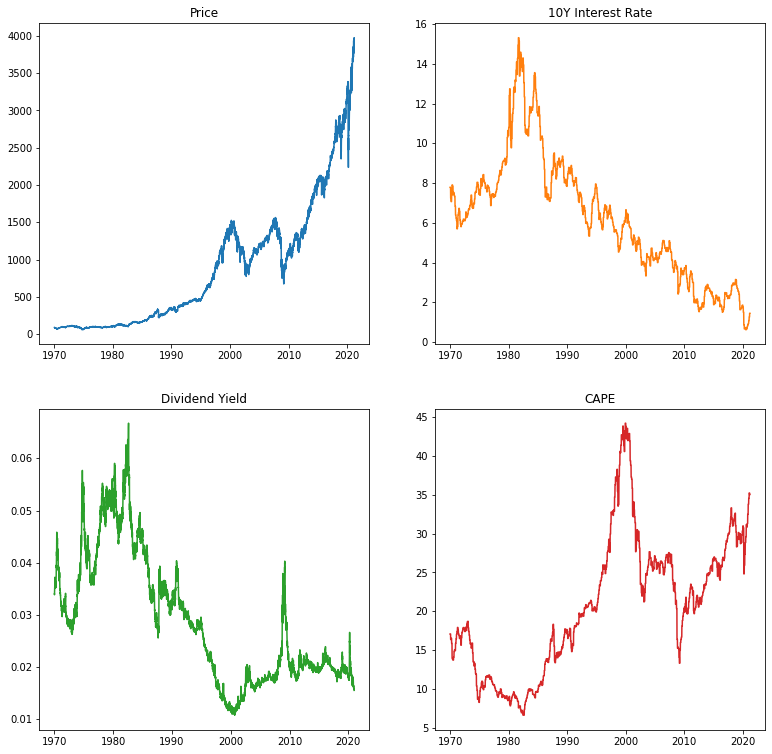

In [5]:
#Plotting using first dataframe.
fig, axs = plt.subplots(2, 2, figsize=(13,13))
axs[0, 0].plot(data.Date, data.Price)
axs[0, 0].set_title('Price')
axs[0, 1].plot(data.Date, data.Long_Interest_Rate_GS10, 'tab:orange')
axs[0, 1].set_title('10Y Interest Rate')
axs[1, 0].plot(data.Date, data.Dividend / data.Price, 'tab:green')
axs[1, 0].set_title('Dividend Yield')
axs[1, 1].plot(data.Date, data.CAPE, 'tab:red')
axs[1, 1].set_title('CAPE')

# Process data

In [6]:
#Initialize variables
starting_amount = 100_000
start = '1970-01-02'
end = data[data['Dividend'].isnull()].iloc[0]['Date'] #Last date
dividend_dates = [4,7,10,12]
capital_dates = [4, 12]
dividend_tax = 0.15           #15%
capital_tax = 0.15            #15%
capital_annual_yield = 0.001 #0.1%
annual_fund_fees = 0.00015   #0.15%

In [7]:
#Get backtesting data object
d = Data_Handler(data, starting_amount, start, end, dividend_dates, capital_dates, dividend_tax,
                 capital_tax, capital_annual_yield, annual_fund_fees)

# Create strategies

In [8]:
#Backtesting values
# (0.2, 0.6, 0.4, 0.1)
drop_pct_threshold = 0.2
rise_pct_threshold = 0.6
buy_pct = 0.4
sell_pct = 0.1

In [9]:
#Create backtesting data object.
strats = Strategies(d, drop_pct_threshold, rise_pct_threshold, buy_pct, sell_pct)

In [10]:
strats.s_basic()
strats.s_1()

# Plot returns

In [15]:
ending_value_basic = d.df.tail(1)['basic'].iloc[0]
ending_value_ultra = d.df.tail(1)['s_1'].iloc[0]

ending_date = d.df.tail(1)['Date'].iloc[0]
starting_date = d.df.head(1)['Date'].iloc[0]

In [16]:
year_diff = (ending_date - starting_date) / datetime.timedelta(days=365)
year_diff

51.03013698630137

In [17]:
annualized_return_basic = (ending_value_basic / starting_amount) **(1/year_diff) - 1
annualized_return_ultra = (ending_value_ultra / starting_amount) **(1/year_diff) - 1

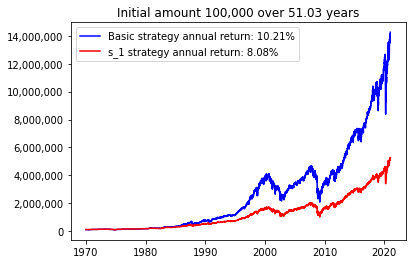

In [18]:
fig, ax = plt.subplots()
ax.plot(d.df.Date,d.df.basic, 'b', label = "Basic strategy annual return: {:.2%}".format(annualized_return_basic))
ax.plot(d.df.Date,d.df.s_1, 'r', label = "s_1 strategy annual return: {:.2%}".format(annualized_return_ultra))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(loc="upper left")
plt.title('Initial amount 100,000 over ' + str(round(year_diff,2)) + ' years')
plt.show()